# Choosing the number of replications

The **confidence interval method** can be used to select the number of replications to run. The more replications you run, the narrower your confidence interval becomes, leading to a more precise estimate of the model's mean performance.

First, you select a desired confidence interval - for example, 95%. Then, run the model with an increasing number of replications, and identify the number required to achieve that precision in the estimate of a given metric - and also, to maintain that precision (as the intervals may converge or expand again later on).

This method is less useful for values very close to zero - so, for example, when using utilisation (which ranges from 0 to 1) it is recommended to multiple values by 100.

When selecting the number of replications you should repeat the analysis for all performance measures and select the highest value as your number of replications.

This notebook shares two ways of implementing this: **manually** and **automated**.

Credit:

* Code for manual choice of replication number was adapted from Tom Monks (2024) [HPDM097 - Making a difference with health data](https://github.com/health-data-science-OR/stochastic_systems) (MIT Licence).
* Code for automated detection of replication number was adapted from Tom Monks (2025) [sim-tools: tools to support the Discrete-Event Simulation process in python](https://github.com/TomMonks/sim-tools) (MIT Licence).

## Set-up

Load required packages.

In [1]:
# pylint: disable=missing-module-docstring
# To ensure any updates to `simulation/` are fetched without needing to restart
# the notebook environment, reload `simulation/` before execution of each cell
%load_ext autoreload
%autoreload 1
%aimport simulation

In [2]:
# pylint: disable=wrong-import-position
import os
import time

from IPython.display import display
import plotly.io as pio

from simulation.model import Param, Runner
from simulation.replications import (
    ReplicationsAlgorithm, confidence_interval_method_simple,
    confidence_interval_method, plotly_confidence_interval_method)

Display plotly express figures as non-interactive figures. This means they will be visible when browsing the notebooks on GitHub. To switch these back to interactive figures, simply remove this line.

In [3]:
pio.renderers.default = 'svg'

Start timer.

In [4]:
notebook_start_time = time.time()

Define path to outputs folder

In [5]:
# pylint: disable=duplicate-code
OUTPUT_DIR = '../outputs/'

Define labels for variables in the dataset.

In [6]:
LABELS = {
    'arrivals': 'Patient arrivals (n)',
    'mean_q_time_nurse': 'Mean wait time for nurse (minutes)',
    'mean_n_consult_time': 'Mean consultation time with nurse (minutes)',
    'mean_time_with_nurse': 'Mean consultation time with nurse (minutes)',
    'mean_nurse_utilisation': 'Mean nurse utilisation',
    'adj_mean_nurse_utilisation': 'Mean nurse utilisation (*100 - %)',
    'adj_mean_q_time_nurse': 'Mean wait time for nurse (*100) (minutes)',
    'mean_nurse_utilisation_tw': 'Time-weighted mean nurse utilisation',
    'mean_nurse_q_length': 'Time-weighted mean queue length for nurse (n)',
    'patient_inter': 'Patient inter-arrival time',
    'number_of_nurses': 'Number of nurses',
    'utilisation': 'Utilisation',
    'running_mean_wait_time': 'Running mean nurse wait time (minutes)'
}

## Manual inspection

First, we demonstrate how to do this manually, by inspecting the output table and figures to determine an appropriate number of replications.

We provide two functions to do this - `confidence_interval_method_simple` and `confidence_interval_method` - both will provide the same results, they just use different methods for calculating the statistics.

### `confidence_interval_method_simple`

Reached desired precision (0.05) in 6 replications.
    replications       data  cumulative_mean     stdev  lower_ci   upper_ci  \
0              1   9.842380         9.842380       NaN       NaN        NaN   
1              2  10.060424         9.951402       NaN       NaN        NaN   
2              3   9.925090         9.942631  0.110075  9.669189  10.216073   
3              4   9.938504         9.941599  0.089900  9.798549  10.084650   
4              5  10.016611         9.956602  0.084775  9.851339  10.061864   
5              6   9.883801         9.944468  0.081442  9.859000  10.029936   
6              7  10.040555         9.958195  0.082742  9.881671  10.034719   
7              8  10.086612         9.974247  0.089048  9.899801  10.048693   
8              9  10.202806         9.999643  0.112884  9.912872  10.086413   
9             10  10.093238        10.009002  0.110467  9.929979  10.088025   
10            11  10.082694        10.015701  0.107128  9.943732  10.087671   


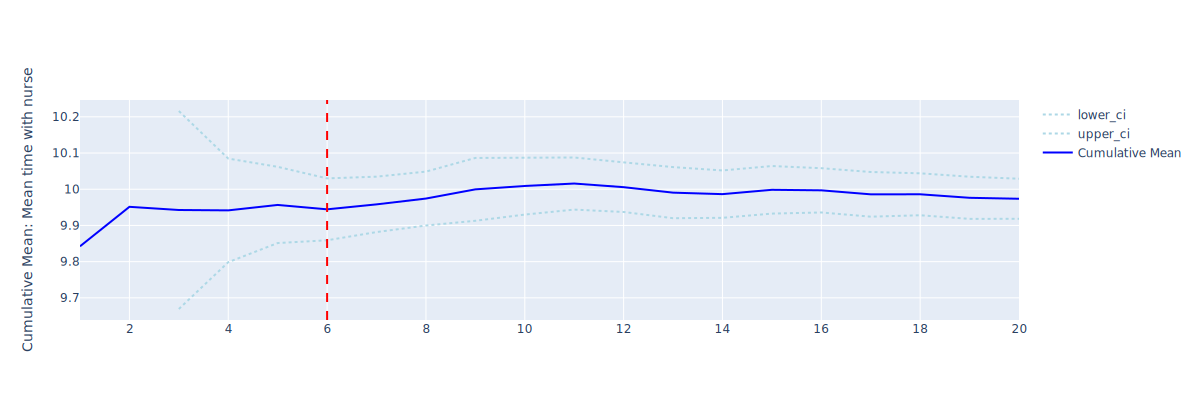

In [7]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=20,
    metric='mean_time_with_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean time with nurse',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_1.png'))

Reached desired precision (0.05) in 31 replications.
    replications       data  cumulative_mean     stdev   lower_ci   upper_ci  \
0              1  50.187329        50.187329       NaN        NaN        NaN   
1              2  51.626386        50.906857       NaN        NaN        NaN   
2              3  53.127972        51.647229  1.470432  47.994472  55.299986   
3              4  49.110360        51.013012  1.746532  48.233890  53.792134   
4              5  46.325224        50.075454  2.585121  46.865602  53.285306   
5              6  39.049515        48.237798  5.060452  42.927179  53.548416   
6              7  47.327735        48.107789  4.632328  43.823600  52.391977   
7              8  61.150168        49.738086  6.297295  44.473416  55.002756   
8              9  47.892602        49.533032  5.922614  44.980508  54.085556   
9             10  56.474736        50.227203  5.999883  45.935145  54.519261   
10            11  57.108864        50.852808  6.058378  46.782735  

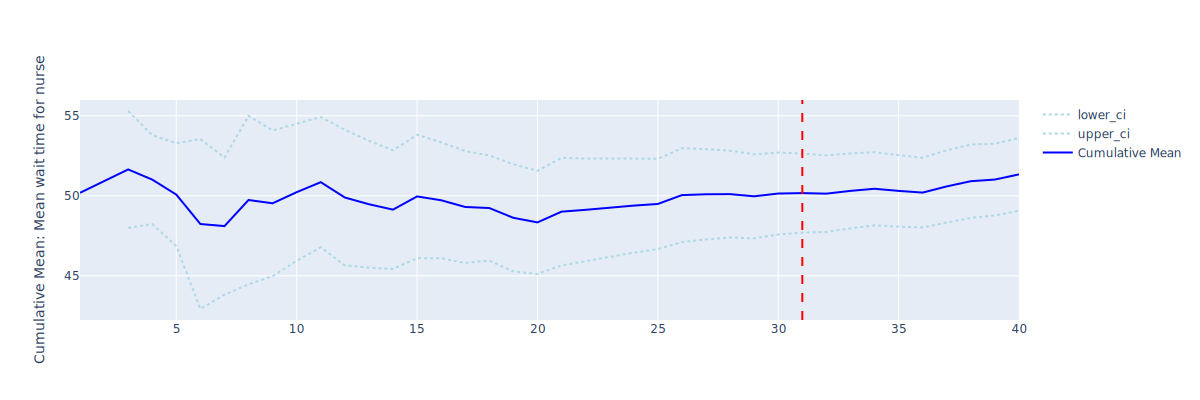

In [8]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=40,
    metric='mean_q_time_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean wait time for nurse',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_2.png'))

Reached desired precision (0.05) in 6 replications.
    replications       data  cumulative_mean     stdev   lower_ci   upper_ci  \
0              1  49.958879        49.958879       NaN        NaN        NaN   
1              2  50.197749        50.078314       NaN        NaN        NaN   
2              3  49.809386        49.988671  0.195888  49.502058  50.475284   
3              4  49.824879        49.947723  0.179690  49.661797  50.233649   
4              5  49.693390        49.896857  0.192752  49.657523  50.136190   
5              6  49.285394        49.794946  0.303376  49.476572  50.113320   
6              7  50.338583        49.872608  0.344844  49.553681  50.191536   
7              8  50.341133        49.931174  0.359679  49.630475  50.231873   
8              9  50.881773        50.036796  0.462171  49.681540  50.392052   
9             10  49.994369        50.032553  0.435945  49.720697  50.344410   
10            11  50.979421        50.118632  0.502542  49.781020  5

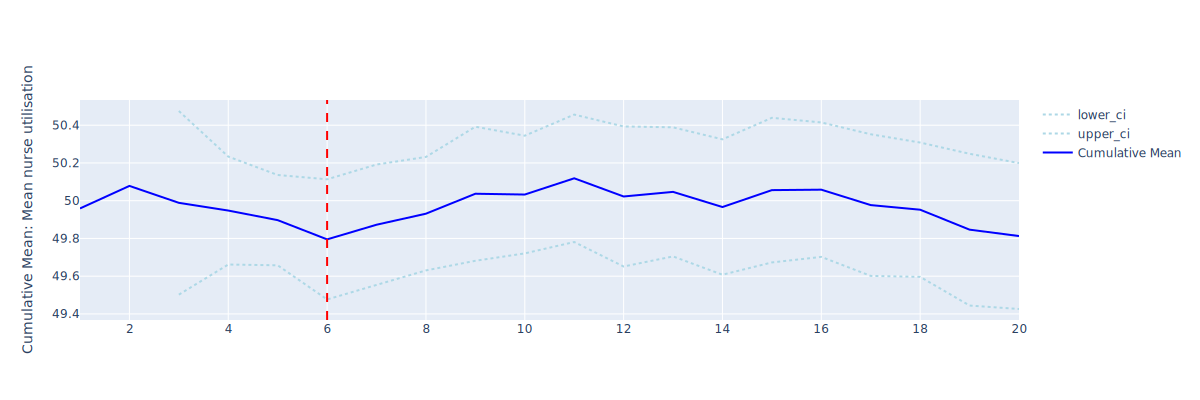

In [9]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=20,
    metric='mean_nurse_utilisation',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean nurse utilisation',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_3.png'))

### `confidence_interval_method`

Reached desired precision (0.05) in 5 replications.
    replications       data  cumulative_mean     stdev  lower_ci   upper_ci  \
0              1   9.842380         9.842380       NaN       NaN        NaN   
1              2  10.060424         9.951402       NaN       NaN        NaN   
2              3   9.925090         9.942631  0.110075  9.669189  10.216073   
3              4   9.938504         9.941599  0.089900  9.798549  10.084650   
4              5  10.016611         9.956602  0.084775  9.851339  10.061864   
5              6   9.883801         9.944468  0.081442  9.859000  10.029936   
6              7  10.040555         9.958195  0.082742  9.881671  10.034719   
7              8  10.086612         9.974247  0.089048  9.899801  10.048693   
8              9  10.202806         9.999643  0.112884  9.912872  10.086413   
9             10  10.093238        10.009002  0.110467  9.929979  10.088025   
10            11  10.082694        10.015701  0.107128  9.943732  10.087671   


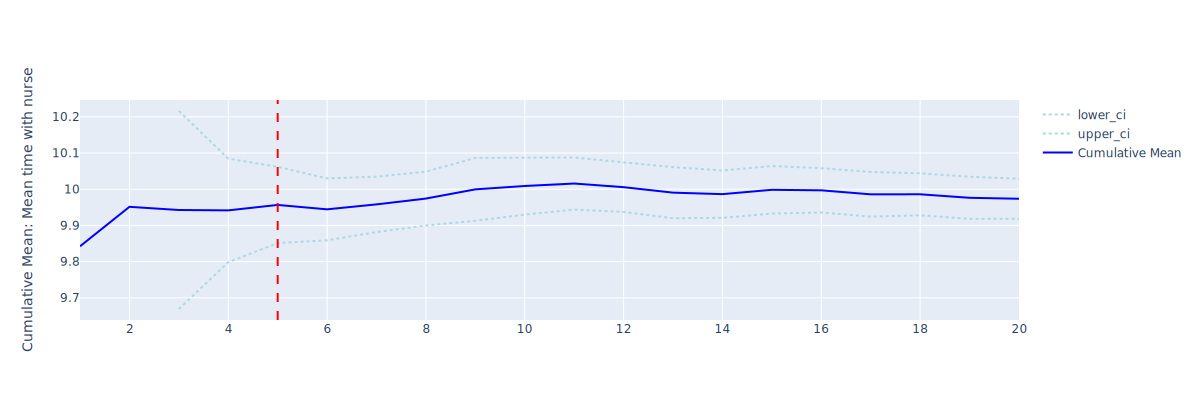

In [10]:
n_reps, cumulative_df = confidence_interval_method(
    replications=20,
    metric='mean_time_with_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean time with nurse')

Reached desired precision (0.05) in 30 replications.
    replications      data  cumulative_mean     stdev  lower_ci  upper_ci  \
0              1  0.501873         0.501873       NaN       NaN       NaN   
1              2  0.516264         0.509069       NaN       NaN       NaN   
2              3  0.531280         0.516472  0.014704  0.479945  0.553000   
3              4  0.491104         0.510130  0.017465  0.482339  0.537921   
4              5  0.463252         0.500755  0.025851  0.468656  0.532853   
5              6  0.390495         0.482378  0.050605  0.429272  0.535484   
6              7  0.473277         0.481078  0.046323  0.438236  0.523920   
7              8  0.611502         0.497381  0.062973  0.444734  0.550028   
8              9  0.478926         0.495330  0.059226  0.449805  0.540856   
9             10  0.564747         0.502272  0.059999  0.459351  0.545193   
10            11  0.571089         0.508528  0.060584  0.467827  0.549229   
11            12  0.393

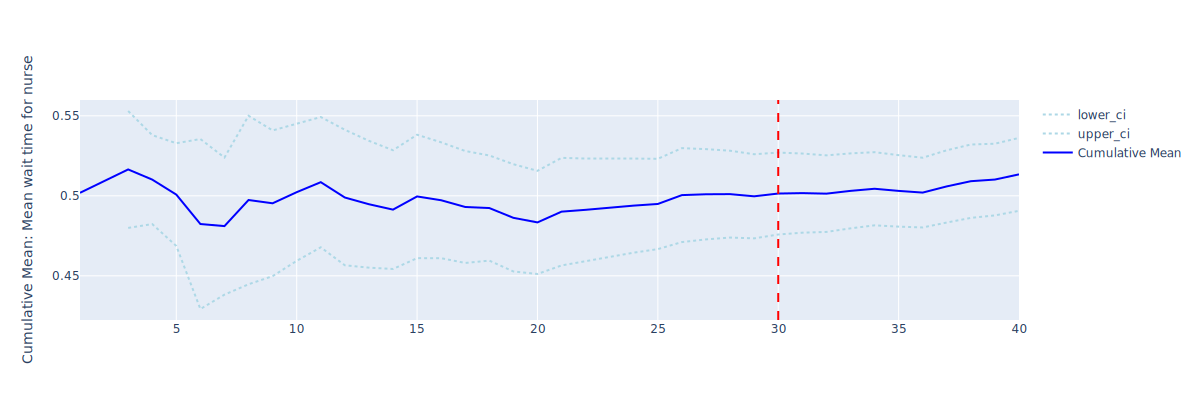

In [11]:
n_reps, cumulative_df = confidence_interval_method(
    replications=40,
    metric='mean_q_time_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean wait time for nurse')

Reached desired precision (0.05) in 5 replications.
    replications      data  cumulative_mean     stdev  lower_ci  upper_ci  \
0              1  0.499589         0.499589       NaN       NaN       NaN   
1              2  0.501977         0.500783       NaN       NaN       NaN   
2              3  0.498094         0.499887  0.001959  0.495021  0.504753   
3              4  0.498249         0.499477  0.001797  0.496618  0.502336   
4              5  0.496934         0.498969  0.001928  0.496575  0.501362   
5              6  0.492854         0.497949  0.003034  0.494766  0.501133   
6              7  0.503386         0.498726  0.003448  0.495537  0.501915   
7              8  0.503411         0.499312  0.003597  0.496305  0.502319   
8              9  0.508818         0.500368  0.004622  0.496815  0.503921   
9             10  0.499944         0.500326  0.004359  0.497207  0.503444   
10            11  0.509794         0.501186  0.005025  0.497810  0.504562   
11            12  0.4896

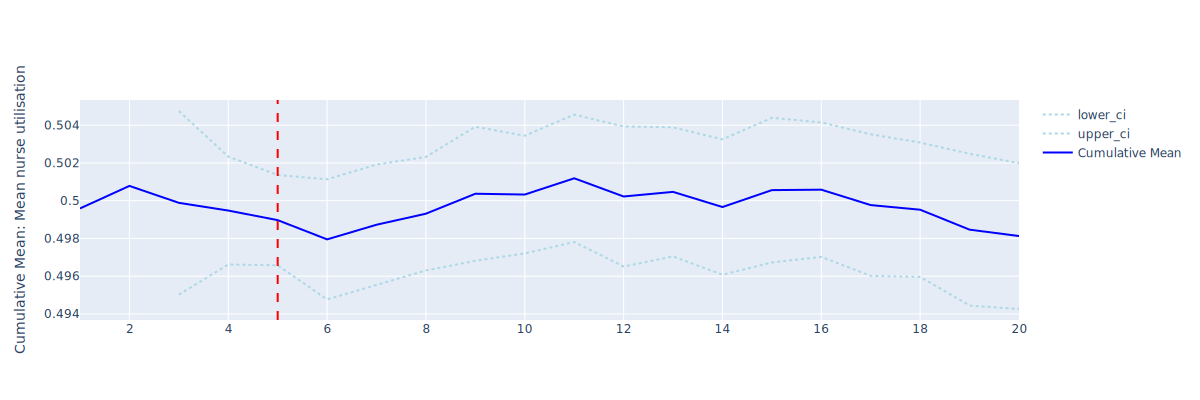

In [12]:
n_reps, cumulative_df = confidence_interval_method(
    replications=20,
    metric='mean_nurse_utilisation',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean nurse utilisation')

## Automated detection of appropriate number of replications

Run the algorithm (which will run model with increasing reps) for a few different metrics.

In [13]:
# Choose metrics to assess
test_metrics = [
    'mean_time_with_nurse', 'mean_q_time_nurse', 'mean_nurse_utilisation']

# Set up and run the algorithm
analyser = ReplicationsAlgorithm()
solutions, cumulative = analyser.select(runner=Runner(Param()),
                                        metrics=test_metrics)

# View results
display(solutions)
display(cumulative)

{'mean_time_with_nurse': 3,
 'mean_q_time_nurse': 31,
 'mean_nurse_utilisation': 3}

,replications,data,cumulative_mean,stdev,lower_ci,upper_ci,deviation,metric
0,1,9.842380,9.842380,NaN,NaN,NaN,NaN,mean_time_with_nurse
1,2,10.060424,9.951402,NaN,NaN,NaN,NaN,mean_time_with_nurse
2,3,9.925090,9.942631,0.110075,9.669189,10.216073,0.027502,mean_time_with_nurse
3,4,9.938504,9.941599,0.089900,9.798549,10.084650,0.014389,mean_time_with_nurse
4,5,10.016611,9.956602,0.084775,9.851339,10.061864,0.010572,mean_time_with_nurse
5,6,9.883801,9.944468,0.081442,9.859000,10.029936,0.008595,mean_time_with_nurse
6,7,10.040555,9.958195,0.082742,9.881671,10.034719,0.007685,mean_time_with_nurse
7,8,10.086612,9.974247,0.089048,9.899801,10.048693,0.007464,mean_time_with_nurse
0,1,0.501873,0.501873,NaN,NaN,NaN,NaN,mean_q_time_nurse
1,2,0.516264,0.509069,NaN,NaN,NaN,NaN,mean_q_time_nurse


Create plots

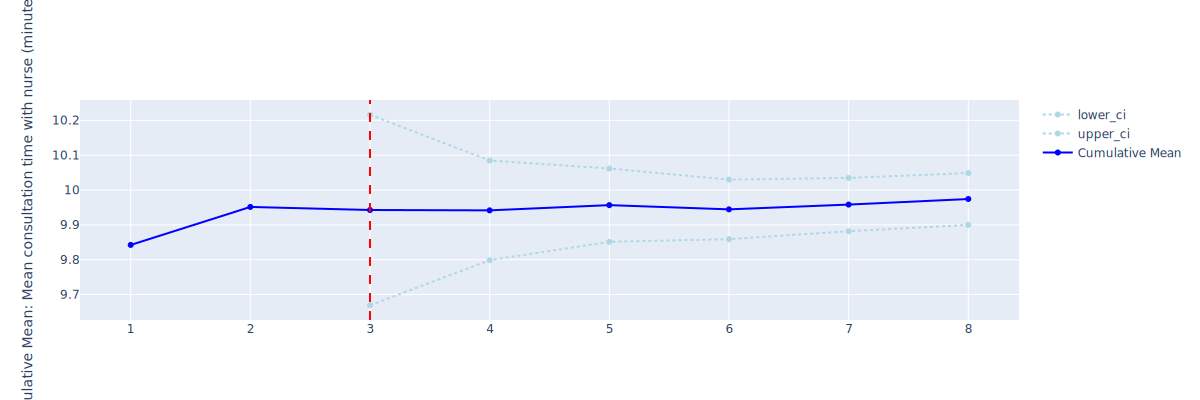

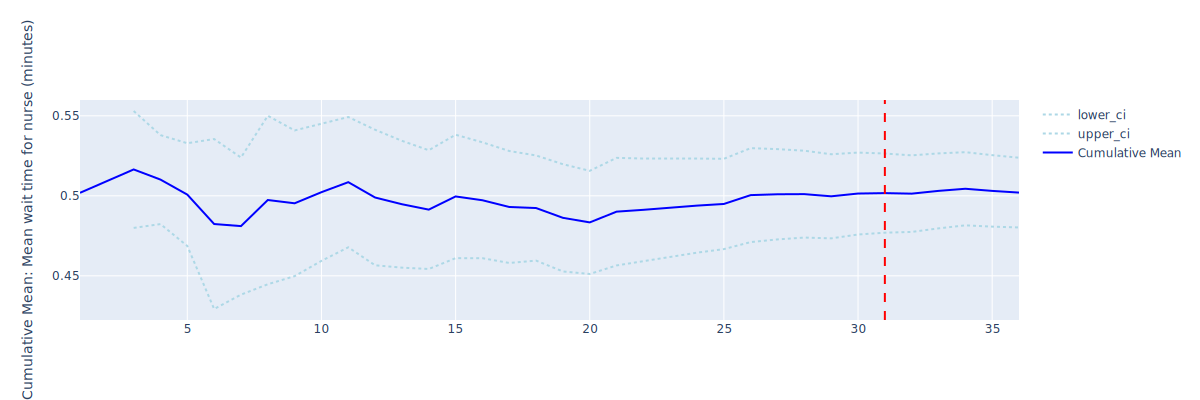

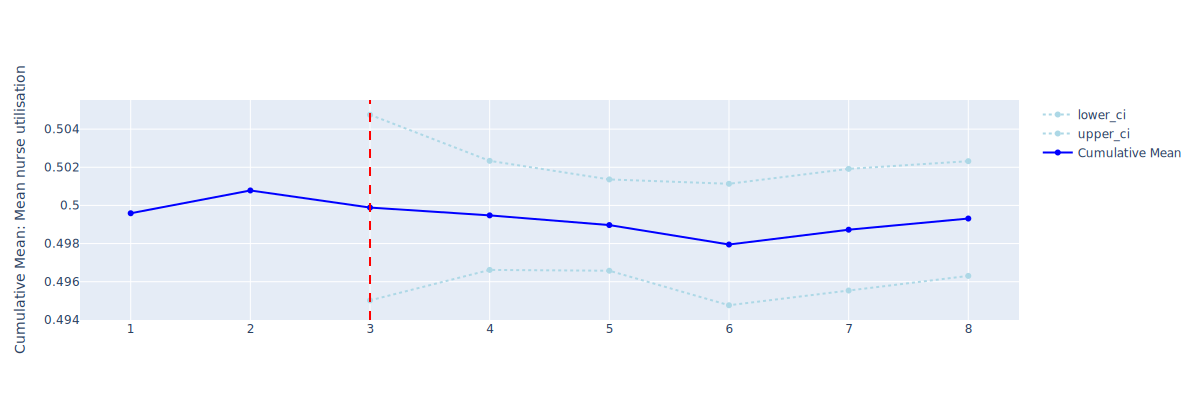

In [14]:
for metric in test_metrics:
    p = plotly_confidence_interval_method(
        n_reps = solutions[metric],
        conf_ints = cumulative[cumulative['metric'] == metric],
        metric_name=LABELS[metric])
    p.show()

## Run time

In [15]:
# Get run time in seconds
notebook_end_time = time.time()
runtime = round(notebook_end_time - notebook_start_time)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime // 60}m {runtime % 60}s')

Notebook run time: 0m 14s
